In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

In [2]:
ls crime_data_raw/2012

apr12.xls*  dec12.xls*  jan12.xls*  jun12.xls*  may12.xls*  oct12.xls*
aug12.xls*  feb12.xls*  jul12.xls*  mar12.xls*  nov12.xls*  sep12.xls*


In [3]:
path = 'crime_data_raw/2012'

In [4]:
ls crime_data_raw/

10years/    2008/  2013/          2015_raw.csv*  premise_codes.csv*
1985_2014/  2009/  2013_raw.csv*  2016/
2005/       2010/  2014/          2016_raw.csv*
2006/       2011/  2014_raw.csv*  2017/
2007/       2012/  2015/          2017_raw.csv*


In [5]:
# get premise codes

pc = pd.read_csv('crime_data_raw/premise_codes.csv')
pc.head()

,Premise Type,Premise Description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [6]:
# rename premise column for easy merge
pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 2 columns):
Premise                126 non-null object
Premise Description    126 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 

df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [10]:
df.Hour.value_counts(dropna=False)

18    7907
12    7408
22    7305
20    7210
19    7199
17    7079
0     7056
21    6885
15    6212
16    6041
23    5770
14    5692
13    5430
8     5238
10    5082
11    5058
9     4735
7     4217
1     3535
2     3349
6     2876
3     2538
4     1981
5     1968
Name: Hour, dtype: int64

In [11]:
df['Hour'] = df['Hour'].astype(str) + ':00'

In [13]:
df.Hour.value_counts(dropna=False)

18:00    7907
12:00    7408
22:00    7305
20:00    7210
19:00    7199
17:00    7079
0:00     7056
21:00    6885
15:00    6212
16:00    6041
23:00    5770
14:00    5692
13:00    5430
8:00     5238
10:00    5082
11:00    5058
9:00     4735
7:00     4217
1:00     3535
2:00     3349
6:00     2876
3:00     2538
4:00     1981
5:00     1968
Name: Hour, dtype: int64

In [14]:
df[df.Date.isnull()]

,Date,Hour,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses


In [15]:
df.to_csv('crime_data_raw/2012_raw.csv')

In [16]:
path = 'crime_data_raw/2012_raw.csv'
df = pd.read_csv(path,parse_dates=[['Date', 'Hour']])

In [17]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05 02:00:00,0,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04 22:00:00,1,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01 23:00:00,2,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21 23:00:00,3,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01 06:00:00,4,Murder,3B10,20A,4200-4299,34TH,ST,W,1


## Inspect Premise col

In [18]:
len(df.Premise.value_counts(dropna=False))

126

In [19]:
df.Premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '06', '01T', '14V', '22C', '04V', '22V', '09V', '13C'],
      dtype=object)

In [20]:
df.Premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '06', '01T', '14V', '22C', '04V', '22V', '09V', '13C'],
      dtype=object)

In [21]:
df.Premise = df.Premise.str.strip()

In [22]:
len(df.Premise.value_counts(dropna=False))

126

In [23]:
df.Premise.value_counts(dropna=False).head()

20A    16963
20R    16740
18A    15070
13R     9323
20D     7823
Name: Premise, dtype: int64

In [24]:
# check if  null values
df.isnull().values.any().any()

False

In [25]:
# check su, of null values
df.isnull().values.sum()

0

In [26]:
len(df[df.isnull().any(axis=1)])

0

## Visualize our data

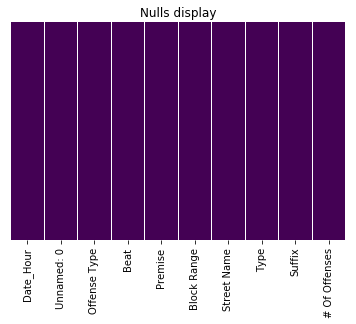

In [28]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## col cleaning

- joining similar columns
- renaming

In [29]:
df.head()

,Date_Hour,Unnamed: 0,Offense Type,Beat,Premise,Block Range,Street Name,Type,Suffix,# Of Offenses
0,2012-04-05 02:00:00,0,Murder,17E40,20R,6100-6199,CLARIDGE,DR,-,1
1,2012-04-04 22:00:00,1,Murder,3B10,18A,11700-11799,HEMPSTEAD,HWY,-,1
2,2012-04-01 23:00:00,2,Murder,19G10,20A,7500-7599,CORPORATE,DR,-,1
3,2012-04-21 23:00:00,3,Murder,8C10,20R,6200-6299,RIETTA,-,-,1
4,2012-04-01 06:00:00,4,Murder,3B10,20A,4200-4299,34TH,ST,W,1


In [ ]:
# # 2014
# # if duplicate columns

# df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
#                               df['BlockRange'].dropna()]).reindex_like(df)

# df['StreetName'] = pd.concat([df['Street Name'].dropna(),
#                               df['StreetName'].dropna()]).reindex_like(df)

# df['# Of Offenses'] = pd.concat([df['# Of'].dropna(),
#                               df['# Of Offenses'].dropna(),
#                               df['# offenses'].dropna(),
#                               df['# Offenses'].dropna()]).reindex_like(df)

In [ ]:
df.head()

In [ ]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [30]:
df.rename(columns={
    '# Of Offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
    'Block Range': 'BlockRange',
    'Street Name': 'StreetName'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 10 columns):
Date_Hour      127771 non-null datetime64[ns]
Unnamed: 0     127771 non-null int64
OffenseType    127771 non-null object
Beat           127771 non-null object
Premise        127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
Type           127771 non-null object
Suffix         127771 non-null object
NumOffenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 9.7+ MB


## Subset dataframe to work on 

In [31]:
crimes = df[['Date_Hour','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127771 entries, 0 to 127770
Data columns (total 7 columns):
Date_Hour      127771 non-null datetime64[ns]
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 6.8+ MB


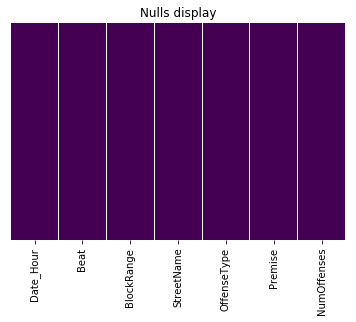

In [32]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

# FIND NAN onevery col

In [35]:
len(crimes[crimes.Date_Hour.isnull()])

0

In [36]:
crimes[crimes.Date_Hour.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [37]:
len(crimes[crimes.Beat.isnull()])

0

In [38]:
crimes[crimes.Beat.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [39]:
len(crimes[crimes.BlockRange.isnull()])

0

In [40]:
crimes[crimes.BlockRange.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [41]:
len(crimes[crimes.StreetName.isnull()])

0

In [42]:
crimes[crimes.StreetName.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [43]:
len(crimes[crimes.OffenseType.isnull()])

0

In [44]:
crimes[crimes.OffenseType.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [45]:
len(crimes[crimes.Premise.isnull()])

0

In [46]:
crimes[crimes.Premise.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [47]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [48]:
crimes[crimes.NumOffenses.isnull()]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


## Find NaN
- drop if > 2 nan

In [51]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [52]:
crimes[crimes.isnull().any(axis=1)]

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses


In [53]:
#crimes = crimes.dropna(thresh=2)

In [ ]:
#crimes[crimes.isnull().any(axis=1)]

## Joint dataframes

In [54]:
# join two datarames
crimes = pd.merge(crimes, pc, on='Premise', how='outer')
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127774 entries, 0 to 127773
Data columns (total 8 columns):
Date_Hour              127771 non-null datetime64[ns]
Beat                   127771 non-null object
BlockRange             127771 non-null object
StreetName             127771 non-null object
OffenseType            127771 non-null object
Premise                127774 non-null object
NumOffenses            127771 non-null float64
Premise Description    127148 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 8.8+ MB


In [55]:
crimes.head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
0,2012-04-05 02:00:00,17E40,6100-6199,CLARIDGE,Murder,20R,1.0,RESIDENCE/HOUSE
1,2012-04-21 23:00:00,8C10,6200-6299,RIETTA,Murder,20R,1.0,RESIDENCE/HOUSE
2,2012-04-30 08:00:00,7C20,4000-4099,LIBERTY,Murder,20R,1.0,RESIDENCE/HOUSE
3,2012-04-12 04:00:00,7C50,19400-19499,BORDERS,Rape,20R,1.0,RESIDENCE/HOUSE
4,2012-04-23 08:00:00,16E20,4100-4199,KNOTTY OAKS,Rape,20R,1.0,RESIDENCE/HOUSE


In [56]:
len(crimes[crimes['Premise Description'].isnull()])

626

In [57]:
crimes[crimes['Premise Description'].isnull()].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
118421,2012-04-22 02:00:00,2A10,1200-1299,HOGAN,Robbery,N,1.0,NaN
118422,2012-08-04 23:00:00,1A30,2000-2099,PORTSMOUTH,Theft,N,1.0,NaN
118423,2012-08-25 14:00:00,7C30,10300-10399,EASTEX,Theft,N,1.0,NaN
118424,2012-12-12 10:00:00,8C50,9300-9399,TIDWELL,Aggravated Assault,N,1.0,NaN
118425,2012-12-12 07:00:00,3B50,4400-4499,NORTH,Theft,N,1.0,NaN


## Problem
- find nan values on one col, and copy related col

In [58]:
crimes.Premise.unique()

array(['20R', '18A', '20A', '13R', '20D', '250', '18B', '20C', '20V',
       '01B', '20P', '140', '18O', '11R', '22M', '18N', '080', '05D',
       '24F', '02B', '24E', '05L', '24P', '05Z', '18C', '13B', '210',
       '070', '18T', '05B', '120', '09D', '03B', '100', '24A', '23S',
       '05O', '18R', '240', '24C', '02S', '18U', '18G', '22H', '18P',
       '18M', '03S', '13H', '13S', '20G', '09P', 'N', '05C', '040', '05P',
       '---', '05Q', '05R', '170', '09H', '12V', '22E', '05S', '11F',
       '18W', '060', '11G', '20M', '18D', '160', '05E', '20N', '05H',
       '22P', '05Y', '190', '25V', '05W', '22D', '24J', '24V', '20W',
       '20L', '05F', '05G', '05N', '09R', '05V', '05X', '24M', '21V',
       '11L', '19V', '24T', '11P', '18H', '18S', '01P', '01A', '24S',
       '22U', '18L', '05M', '01K', '11C', '05A', '150', '24B', '05U',
       '24G', '20H', '11S', '11V', '13A', '02C', '13T', '25R', '05T',
       '06', '01T', '14V', '22C', '04V', '22V', '09V', '13C', '01R',
       '02V', '1

In [59]:
len(crimes[crimes['Premise'] == '---'])

582

In [60]:
len(crimes[crimes['Premise'] == 'N'])

26

In [61]:
crimes[crimes['Premise'] == 'N'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
118421,2012-04-22 02:00:00,2A10,1200-1299,HOGAN,Robbery,N,1.0,NaN
118422,2012-08-04 23:00:00,1A30,2000-2099,PORTSMOUTH,Theft,N,1.0,NaN
118423,2012-08-25 14:00:00,7C30,10300-10399,EASTEX,Theft,N,1.0,NaN
118424,2012-12-12 10:00:00,8C50,9300-9399,TIDWELL,Aggravated Assault,N,1.0,NaN
118425,2012-12-12 07:00:00,3B50,4400-4499,NORTH,Theft,N,1.0,NaN


In [62]:
crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [63]:
len(crimes[crimes['Premise Description'].isnull()])

0

In [64]:

len(crimes[crimes['Premise'] == '---'])

582

In [65]:
crimes[crimes['Premise'] == '---'].head()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
120221,2012-04-26 22:00:00,19G40,12200-12299,DAIRY ASHFORD,Robbery,---,1.0,---
120222,2012-04-01 02:00:00,2A50,1300-1399,UTAH,Aggravated Assault,---,1.0,---
120223,2012-04-05 16:00:00,11H10,7700-7799,CAPITOL,Aggravated Assault,---,1.0,---
120224,2012-04-18 10:00:00,2A20,600-699,CAVALCADE,Aggravated Assault,---,1.0,---
120225,2012-04-11 19:00:00,17E40,6600-6699,BELLFORT,Aggravated Assault,---,1.0,---


## Visualize data

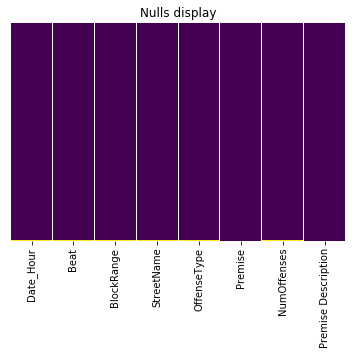

In [66]:
sns.heatmap(crimes.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Nulls display')
plt.show()

## Display any null values

In [67]:
len(crimes[crimes.isnull().any(axis=1)])

3

In [68]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
127771,NaT,NaN,NaN,NaN,NaN,01R,NaN,LIGHT RAIL VEHICLE
127772,NaT,NaN,NaN,NaN,NaN,02V,NaN,VACANT BANK
127773,NaT,NaN,NaN,NaN,NaN,15V,NaN,VACANT JAIL/PRISON


## drop rows with 2 or 3 or more NaN

In [69]:
crimes = crimes.dropna(thresh=3)

In [70]:
len(crimes[crimes.isnull().any(axis=1)])

0

In [71]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date_Hour,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description


## Inspect each column

In [72]:
crimes.dtypes

Date_Hour              datetime64[ns]
Beat                           object
BlockRange                     object
StreetName                     object
OffenseType                    object
Premise                        object
NumOffenses                   float64
Premise Description            object
dtype: object

## Beat

In [73]:
len(crimes.Beat.value_counts())

121

In [74]:
len(crimes.Beat.value_counts(dropna=False))

121

In [75]:
crimes.Beat.unique()

array(['17E40', '8C10', '7C20', '7C50', '16E20', '10H10', '2A10', '6B10',
       '7C10', '1A10', '3B10', '3B40', '6B30', '20G70', '3B50', '14D10',
       '15E20', '14D30', '11H30', '10H50', '19G30', '12D10', '14D20',
       '19G40', '16E10', '12D20', '3B30', '13D10', '17E20', '12D40',
       '5F30', '6B20', '18F50', '8C40', '18F10', '5F20', '8C60', '6B40',
       '12D60', '15E30', '8C30', '19G20', '8C50', '17E30', '14D40',
       '12D70', '9C40', '8C20', '10H40', '20G80', '11H40', '20G40',
       '2A30', '16E40', '7C30', '13D20', '2A20', '2A50', '10H20', '16E30',
       '20G50', '15E10', '10H60', '6B50', '11H20', '11H10', '9C30',
       '9C20', '13D40', '20G20', '18F60', '24C30', '4F20', '5F10', '4F30',
       '1A20', '17E10', '19G50', '18F20', '24C10', '4F10', '2A40', '1A30',
       '18F30', '20G30', '18F40', '24C60', '19G10', '1A40', '10H80',
       '7C40', '5F40', '2A60', '9C10', '20G60', '14D50', '23J40', '10H70',
       '13D30', '10H30', '11H50', '12D50', '6B60', '24C20', '1A50',


In [76]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [77]:
len(crimes.Beat.value_counts(dropna=False))

121

In [78]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [79]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

121

In [80]:
crimes.Beat.unique()

array(['17E40', '8C10', '7C20', '7C50', '16E20', '10H10', '2A10', '6B10',
       '7C10', '1A10', '3B10', '3B40', '6B30', '20G70', '3B50', '14D10',
       '15E20', '14D30', '11H30', '10H50', '19G30', '12D10', '14D20',
       '19G40', '16E10', '12D20', '3B30', '13D10', '17E20', '12D40',
       '5F30', '6B20', '18F50', '8C40', '18F10', '5F20', '8C60', '6B40',
       '12D60', '15E30', '8C30', '19G20', '8C50', '17E30', '14D40',
       '12D70', '9C40', '8C20', '10H40', '20G80', '11H40', '20G40',
       '2A30', '16E40', '7C30', '13D20', '2A20', '2A50', '10H20', '16E30',
       '20G50', '15E10', '10H60', '6B50', '11H20', '11H10', '9C30',
       '9C20', '13D40', '20G20', '18F60', '24C30', '4F20', '5F10', '4F30',
       '1A20', '17E10', '19G50', '18F20', '24C10', '4F10', '2A40', '1A30',
       '18F30', '20G30', '18F40', '24C60', '19G10', '1A40', '10H80',
       '7C40', '5F40', '2A60', '9C10', '20G60', '14D50', '23J40', '10H70',
       '13D30', '10H30', '11H50', '12D50', '6B60', '24C20', '1A50',


In [81]:
crimes.Beat.value_counts(dropna=False).head()

12D10    2973
19G10    2832
6B60     2797
3B10     2476
13D20    2397
Name: Beat, dtype: int64

## BlockRange

In [82]:
len(crimes.BlockRange.value_counts(dropna=False))

243

In [83]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1828
100-199      1725
9400-9499    1681
4400-4499    1534
800-899      1503
Name: BlockRange, dtype: int64

In [84]:
# strip
crimes.BlockRange = crimes.BlockRange.str.strip()

In [85]:
len(crimes.BlockRange.value_counts(dropna=False))

243

## StreetName

In [86]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:7553


In [87]:
crimes.StreetName = crimes.StreetName.str.strip()

In [88]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:7553


In [89]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER    3534
GESSNER       2000
GULF          1909
RICHMOND      1786
NORTH         1738
Name: StreetName, dtype: int64


## OffenseType

In [90]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:7


In [91]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [92]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:7


In [93]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67978
Burglary              26630
Auto Theft            12672
Aggravated Assault    10238
Robbery                9385
Rape                    663
Murder                  205
Name: OffenseType, dtype: int64


## Premise

In [94]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:126


In [95]:
crimes.Premise = crimes.Premise.str.strip()

In [96]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:126


In [97]:
crimes.Premise.value_counts(dropna=False).head()

20A    16963
20R    16740
18A    15070
13R     9323
20D     7823
Name: Premise, dtype: int64

## Premise Description

In [98]:
print('before:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

before:126


In [99]:
#crimes.Beat = crimes.Beat.str.replace(r"\'(.+?)\'", ' ')
crimes['Premise Description'] = crimes['Premise Description'].str.strip()

In [100]:
print('after:{}'.format(len(crimes['Premise Description'].value_counts(dropna=False))))

after:126


In [101]:
print(crimes['Premise Description'].value_counts(dropna=False).head())

APARTMENT                16963
RESIDENCE/HOUSE          16740
APARTMENT PARKING LOT    15070
ROAD/STREET/SIDEWALK      9323
DRIVEWAY                  7823
Name: Premise Description, dtype: int64


# Set Date as index

In [102]:
# date
crimes.Date_Hour = pd.to_datetime(crimes.Date_Hour)

crimes = crimes.set_index('Date_Hour').sort_index(ascending=True)

In [103]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description
Date_Hour,,,,,,,
1973-11-16 13:00:00,1A30,2500-2599,RICHMOND,Theft,210,1.0,RESTAURANT/CAFETERIA
1975-05-17 15:00:00,4F30,1800-1899,BARKER CYPRESS,Robbery,20A,1.0,APARTMENT
1979-07-07 02:00:00,18F50,3400-3499,DUNVALE,Burglary,20A,1.0,APARTMENT
1982-01-01 15:00:00,19G30,13000-13099,LEADER,Rape,20A,1.0,APARTMENT
1987-03-20 00:00:00,18F30,6300-6399,WINDSWEPT,Theft,05N,1.0,MAINTENANCE/BUILDING SERVICES


## Create Columns with day,weekday,month,year from date index

In [104]:
# get day, weekday,month ,year
crimes['Hour'] = crimes.index.strftime('%H')
crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [105]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,
1973-11-16 13:00:00,1A30,2500-2599,RICHMOND,Theft,210,1.0,RESTAURANT/CAFETERIA,13,16,Friday,Nov,1973
1975-05-17 15:00:00,4F30,1800-1899,BARKER CYPRESS,Robbery,20A,1.0,APARTMENT,15,17,Saturday,May,1975
1979-07-07 02:00:00,18F50,3400-3499,DUNVALE,Burglary,20A,1.0,APARTMENT,02,07,Saturday,Jul,1979
1982-01-01 15:00:00,19G30,13000-13099,LEADER,Rape,20A,1.0,APARTMENT,15,01,Friday,Jan,1982
1987-03-20 00:00:00,18F30,6300-6399,WINDSWEPT,Theft,05N,1.0,MAINTENANCE/BUILDING SERVICES,00,20,Friday,Mar,1987


## null values

- check
- count
- display

In [106]:
crimes.isnull().values.any().any()

False

In [107]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

0

In [108]:
crimes[crimes.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Premise Description,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,,


In [109]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127771 entries, 1973-11-16 13:00:00 to 2029-05-26 03:00:00
Data columns (total 12 columns):
Beat                   127771 non-null object
BlockRange             127771 non-null object
StreetName             127771 non-null object
OffenseType            127771 non-null object
Premise                127771 non-null object
NumOffenses            127771 non-null float64
Premise Description    127771 non-null object
Hour                   127771 non-null object
day                    127771 non-null object
weekday                127771 non-null object
month                  127771 non-null object
year                   127771 non-null object
dtypes: float64(1), object(11)
memory usage: 15.2+ MB


## New Dataframe
- remove premise col
- keep premise description

In [110]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise Description','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1973-11-16 13:00:00,1A30,2500-2599,RICHMOND,Theft,RESTAURANT/CAFETERIA,1.0,13,16,Friday,Nov,1973
1975-05-17 15:00:00,4F30,1800-1899,BARKER CYPRESS,Robbery,APARTMENT,1.0,15,17,Saturday,May,1975
1979-07-07 02:00:00,18F50,3400-3499,DUNVALE,Burglary,APARTMENT,1.0,02,07,Saturday,Jul,1979
1982-01-01 15:00:00,19G30,13000-13099,LEADER,Rape,APARTMENT,1.0,15,01,Friday,Jan,1982
1987-03-20 00:00:00,18F30,6300-6399,WINDSWEPT,Theft,MAINTENANCE/BUILDING SERVICES,1.0,00,20,Friday,Mar,1987


In [111]:
crime_yr.isnull().values.any().any()

False

In [112]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [113]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


# FIND NANS

## INDEX

In [114]:
len(crime_yr[crime_yr.index.isnull()])

0

In [115]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [116]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1973-11-16 13:00:00', '1975-05-17 15:00:00',
               '1979-07-07 02:00:00', '1982-01-01 15:00:00',
               '1987-03-20 00:00:00', '1988-04-26 21:00:00',
               '1989-02-06 00:00:00', '1989-05-13 02:00:00',
               '1993-12-05 20:00:00', '1994-03-01 00:00:00',
               ...
               '2012-12-31 23:00:00', '2012-12-31 23:00:00',
               '2012-12-31 23:00:00', '2012-12-31 23:00:00',
               '2013-01-01 00:00:00', '2013-01-03 10:00:00',
               '2014-10-14 23:00:00', '2020-10-11 22:00:00',
               '2021-01-03 00:00:00', '2029-05-26 03:00:00'],
              dtype='datetime64[ns]', name='Date_Hour', length=127771, freq=None)

In [117]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [118]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [119]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [120]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [121]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [122]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## BlockRAnge

In [123]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [124]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## StreetName

In [125]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

In [126]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## OffenseType

In [127]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

In [128]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Hour

In [129]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [130]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Premsie Description

In [131]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [132]:
crime_yr[crime_yr['Premise Description'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [133]:
crime_yr['Premise Description'] = crime_yr['Premise Description'].replace(np.nan, 'No label')

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
len(crime_yr[crime_yr['Premise Description'].isnull()])

0

In [135]:
crime_yr[crime_yr['Premise Description'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


In [136]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [137]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise Description,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,


## Save

In [138]:
# change column name from Premise Descriptionto Premise

crime_yr.rename(columns={
    'Premise Description': 'Premise',}, inplace=True)
crime_yr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 127771 entries, 1973-11-16 13:00:00 to 2029-05-26 03:00:00
Data columns (total 11 columns):
Beat           127771 non-null object
BlockRange     127771 non-null object
StreetName     127771 non-null object
OffenseType    127771 non-null object
Premise        127771 non-null object
NumOffenses    127771 non-null float64
Hour           127771 non-null object
day            127771 non-null object
weekday        127771 non-null object
month          127771 non-null object
year           127771 non-null object
dtypes: float64(1), object(10)
memory usage: 11.7+ MB


/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [139]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date_Hour,,,,,,,,,,,
1973-11-16 13:00:00,1A30,2500-2599,RICHMOND,Theft,RESTAURANT/CAFETERIA,1.0,13,16,Friday,Nov,1973
1975-05-17 15:00:00,4F30,1800-1899,BARKER CYPRESS,Robbery,APARTMENT,1.0,15,17,Saturday,May,1975
1979-07-07 02:00:00,18F50,3400-3499,DUNVALE,Burglary,APARTMENT,1.0,02,07,Saturday,Jul,1979
1982-01-01 15:00:00,19G30,13000-13099,LEADER,Rape,APARTMENT,1.0,15,01,Friday,Jan,1982
1987-03-20 00:00:00,18F30,6300-6399,WINDSWEPT,Theft,MAINTENANCE/BUILDING SERVICES,1.0,00,20,Friday,Mar,1987


In [140]:
ls crime_data_clean/years

Final_crime13_clean.csv*  Final_crime15_clean.csv*  Final_crime17_clean.csv*
Final_crime14_clean.csv*  Final_crime16_clean.csv*


In [141]:
#crime_yr.to_csv('crime_data_clean/new/Final_crime12_clean.csv')
crime_yr.to_csv('crime_data_clean/years/Final_crime12_clean.csv')

In [142]:
ls crime_data_clean/years

Final_crime12_clean.csv*  Final_crime14_clean.csv*  Final_crime16_clean.csv*
Final_crime13_clean.csv*  Final_crime15_clean.csv*  Final_crime17_clean.csv*
